# Module 5 : Performance measurements of Decision Tree Classifier:

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = pd.read_csv("alzheimer.csv")

In [4]:
df=data.dropna()

In [5]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [6]:
df.rename(columns={"M/F":"GENDER"}, inplace=True)

In [7]:
df["Group"] = df['Group'].map({"Nondemented":"Nondemented", "Demented":"Demented", "Converted":"Demented"})

In [8]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [9]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['GENDER']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [10]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Group', axis=1)
#Response variable
y = df.loc[:,'Group'] 

In [11]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Decision Tree Classifier:

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

predictR = dtc.predict(X_test)

print("")
print('Classification report of Decision Tree Classifier Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Decision Tree Classifier is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")

accuracy = cross_val_score(dtc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Decision Tree Classifier is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Decision Tree Classifier Results:

              precision    recall  f1-score   support

    Demented       0.92      0.92      0.92        50
 Nondemented       0.93      0.93      0.93        57

    accuracy                           0.93       107
   macro avg       0.92      0.92      0.92       107
weighted avg       0.93      0.93      0.93       107


Confusion Matrix result of Decision Tree Classifier is:
 [[46  4]
 [ 4 53]]

Sensitivity :  0.92

Specificity :  0.9298245614035088

Cross validation test results of accuracy:
[0.88732394 0.83098592 0.83098592 0.84507042 0.74285714]

Accuracy result of Decision Tree Classifier is: 82.74446680080482


In [13]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Decision Tree Classifier "
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Alzheimer Prediction",fontsize=15)
    plt.legend(b,data,fontsize=9)

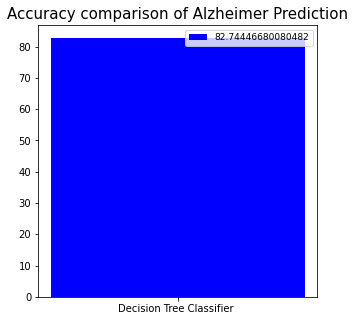

In [14]:
graph()

In [15]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 53
True Negative : 46
False Positive : 4
False Negative : 4

True Positive Rate : 0.9298245614035088
True Negative Rate : 0.92
False Positive Rate : 0.08
False Negative Rate : 0.07017543859649122

Positive Predictive Value : 0.9298245614035088
Negative predictive value : 0.92


Confusion matrix-DecisionTreeClassifier:
[[46  4]
 [ 4 53]]


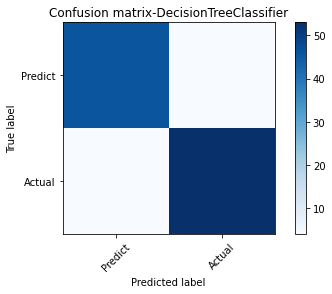

In [16]:
def plot_confusion_matrix(cm2, title='Confusion matrix-DecisionTreeClassifier', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-DecisionTreeClassifier:')
print(cm2)
plot_confusion_matrix(cm2)